# Network Training

In this tutorial, we introduce different topics related to the training of deep neural networks, including data augmentation, optimization/regularization techniques, weight initializations and hyperparameters tuning.


In [50]:
from google.colab import drive
import os
import json
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf

def plot_history(history, metric = None):
  # Plots the loss history of training and validation (if existing)
  # and a given metric
  # Be careful because the axis ranges are automatically adapted
  # which may not desirable to compare different runs.
  # Also, in some cases you may want to combine several curves in one
  # figure for easier comparison, which this function does not do.
  
  if metric != None:
    fig, axes = plt.subplots(2,1)
    axes[0].plot(history.history[metric])
    try:
      axes[0].plot(history.history['val_'+metric])
      axes[0].legend(['Train', 'Val'])
    except:
      pass
    axes[0].set_title('{:s}'.format(metric))
    axes[0].set_ylabel('{:s}'.format(metric))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(history.history['loss'])
    try:
      axes[1].plot(history.history['val_loss'])
      axes[1].legend(['Train', 'Val'])
    except:
      pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
  else:
    plt.plot(history.history['loss'])
    try:
      plt.plot(history.history['val_loss'])
      plt.legend(['Train', 'Val'])
    except:
      pass
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
  


In [23]:


drive.mount('/content/drive')
os.chdir("drive/My Drive/Deep Learning 2021/Notebook Three - Network Training")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3488 - categorical_accuracy: 0.8915 - val_loss: 0.1184 - val_categorical_accuracy: 0.9628
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0831 - categorical_accuracy: 0.9746 - val_loss: 0.0971 - val_categorical_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0591 - categorical_accuracy: 0.9804 - val_loss: 0.1011 - val_categorical_accuracy: 0.9716
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0218 - categorical_accuracy: 0.9933 - val_loss: 0.0690 - val_categorical_accuracy: 0.9804
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0082 - categorical_accuracy: 0.9982 - val_loss: 0.0786 - val_categorical_accuracy: 0.9789
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0048 - categorical_accuracy: 0.9988 - val_loss: 0.0706 - val_categorical_accuracy:

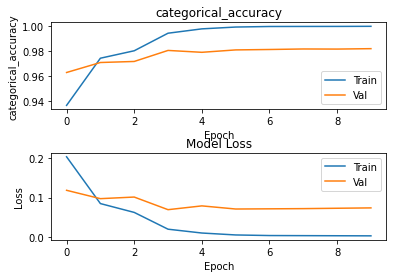

In [ ]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=0.00001, min_delta = 0.01)
model, x_train, y_train, x_test, y_test = get_data_model() 
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
initial_lr = K.get_value(model.optimizer.lr)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])
print('Initial Learning Rate: {:.4f}'.format(initial_lr))
print('Final Learning Rate: {:.10f}'.format(K.eval(model.optimizer.lr)))
plot_history(history, 'categorical_accuracy')

Again, we check how the learning rate has changed. You can check that the learning has indeed decreased when the `val_loss` has not improved by more than 0.01 until it reached the `min_lr` value.

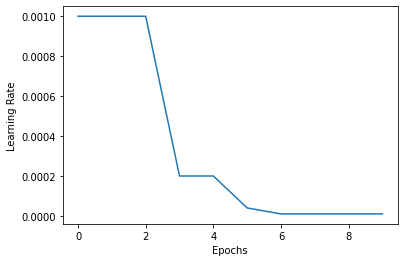

In [ ]:
learning_rate = history.history['lr']
plt.plot(range(0, len(learning_rate)), learning_rate)
plt.ylabel('Learning Rate')
plt.xlabel('Epochs')
plt.show()

# Coursework

### Task 1: Tuning a Classification Model
In a machine learning problem, and especially when using a deep learning approach, finding the right set of hyperparameters, the right data augmentation strategy, or a good regularization method can make the difference between a model that performs poorly and a model with great accuracy. 

For this exercise, you will be training a CNN to perform classification in CIFAR-10 (we use the official test set, which is why the variables are called `x_test` and `y_test`, as our validation set) and will analyze the impact of some of the most important elements presented in this tutorial. 

Use the CNN we give in the code below, along with the given optimizer and number of training epochs as the default setting. Only modify the given CNN architecture to add Dropout or Batch Normalization layers when explicitly stated. Use 40 epochs to plot all of your curves. However, you can train for more epochs to find your best validation performance if your network has not finished training in those 40 epochs.

**Report:**
*  First, train the given default model without any data augmentation. Then define two data augmentation strategies (one more aggressive than the other) and train the model with data augmentation. Clearly state the two augmentation strategies you apply (i.e., the specific transformations). Discuss the training and validation loss curves for the two data augmentation strategies along with the original run without data augmentation. Attach in the appendix those training and validation curves. Report in a table the best validation accuracy obtained for the three runs (no data augmentation, data augmentation 1, data augmentation 2).

*  Without using any data augmentation, analyze the effect of using Dropout in the model. Carry out the same analysis for Batch Normalization. Finally, combine both. Report in the same table as in the data augmentation task the best validation accuracy for each of the three settings (baseline + Dropout, baseline + Batch Normalization, baseline + Batch Normalization + Dropout). The performance will vary depending on where the Dropout layers and Batch Normalization layers, so state clearly where you added the layers, and what rate you used for the Dropout layers. Discuss the results.

* Using the default model/hyperparameters and no data augmentation, report the best validation accuracy when using `zeros` for the kernel initialization. Report the performance in the same table as in the dropout/batch normalization/data augmentation tasks. Discuss the results that you obtained.

*  Using the default model and no data augmentation, change the optimizer to SGD and train it with learning rates of `3e-3`, `1e-3` and `3e-4`. Report in a figure the training and validation loss for the three learning rate values and discuss the figure.

In [43]:
import numpy as np
import keras
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import Adam, SGD
from keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

X_train = X_train.reshape(-1,32,32,3)

## Normalization block
norm_layer = preprocessing.Normalization()
norm_layer.adapt(X_train)
X_train_n = norm_layer(X_train)
X_test_n = norm_layer(X_test)

# You can modify the data_augmentation variable below to add your
# data augmentation pipeline.
# By default we do not apply any augmentation (RandomZoom(0) is equivalent
# to not performing any augmentation)
data_augmentation = keras.Sequential(
    [
        preprocessing.RandomZoom(0)
    ]
)
# We will use glorot_uniform as a initialization by default
initialization = 'glorot_uniform'
# Use the architecture given below, only modify it to add Dropout/BatchNorm
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
# As we use global average pooling, we don't need to use Flatten
model.add(GlobalAveragePooling2D())
model.add(Dense(10, kernel_initializer=initialization))
model.add(Activation('softmax'))


Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)
# By default use Adam with lr=3e-4. Change it to SGD when asked to
opt = Adam(lr=3e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Use 40 epochs as default value to plot your curves
history = model.fit(X_train_n, Y_train_class, epochs=40, validation_data=(X_test_n,Y_test_class))

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Epoch 1/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7613 - accuracy: 0.3439 - val_loss: 1.2736 - val_accuracy: 0.5404
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2142 - accuracy: 0.5676 - val_loss: 1.0799 - val_accuracy: 0.6180
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0385 - accuracy: 0.6349 - val_loss: 1.0201 - val_accuracy: 0.6398
Epoch 4/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9083 - accuracy: 0.6794 - val_loss: 0.8952 - val_accuracy: 0.6837
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8282 - accuracy: 0.7083 - val_loss: 0.7964 - val_accuracy: 0.7213
Epoch 6/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7527 - accuracy: 0.7376 - val_loss: 0.7859 - val_accuracy: 0.7275
Epoch 7/40
1563/1563 [=======

In [42]:
model.save("NoAugModel")

INFO:tensorflow:Assets written to: NoAugModel/assets


In [41]:
reconstructed_model = keras.models.load_model("NoAugModel")
history2 = reconstructed_model.fit(X_train_n, Y_train_class, epochs=1, validation_data=(X_test_n,Y_test_class))

1563/1563 [==============================] - 8s 5ms/step - loss: 0.4658 - accuracy: 0.8381 - val_loss: 0.6520 - val_accuracy: 0.7816


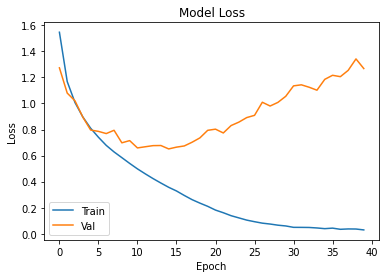

In [44]:
plot_history(history)

In [49]:
dataNoAug=pd.DataFrame.from_dict(history.history)
dataNoAug.to_csv('dataNoAug.csv')
# !cp dataNoAug.csv "/content/drive/My Drive/Deep Learning 2021/Notebook Three - Network Training"